In [5]:
import pandas as pd
import re
from webweb import Web
import hashlib
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Lynguo_def2.csv', sep= ';', error_bad_lines = False)

In [7]:
df= df.drop([78202], axis= 0)

In [10]:
dfMentions = df[['Usuario', 'Texto']].copy()

In [11]:
dfMentions=dfMentions.dropna()

In [12]:
dfEliminarRTs = dfMentions[dfMentions['Texto'].str.match('RT @')]



In [13]:

dfMentions=dfMentions.drop(dfEliminarRTs.index)


In [14]:
mentionsSubset = dfMentions[['Usuario', 'Texto']]

mentionsList = [list(x) for x in mentionsSubset.to_numpy()]
mentionEdges = []
for row in mentionsList:
    match = re.search('@(\w+)', row[1])
    if match:
        match = match.group(1)
        row[1] = hashlib.md5(match.encode()).hexdigest()  
        mentionEdges.append(row)

In [26]:
web = Web(mentionEdges)
web.display.gravity = 1
web.show()

In [ ]:
G = nx.Graph()
G.add_edges_from(mentionEdges)

In [88]:
lista_cc = list(nx.connected_components(G))
Gmax = max(nx.connected_components(G), key=len) #Extraemos el componente m√°s conectado

In [ ]:
def get_subgraphs(graph):
    import networkx as nx
    components = list(nx.connected_components(graph))
    list_subgraphs = []
    for component in components:
        list_subgraphs.append(graph.subgraph(component))

    return list_subgraphs

In [46]:
subgraphs = get_subgraphs(G)
web1 = Web(nx_G= nx.Graph(subgraphs[1]))
web1.display.gravity = 1
web1.show()

In [57]:
print(len(get_subgraphs(G)))
    

3378


In [89]:
web1= Web(nx_G=subgraphs[1])
web1.networks.add_layer(nx_G=subgraphs[2])
web1.networks.add_layer(nx_G=subgraphs[3])
web1.display.networkName = 'web1'
web.show()

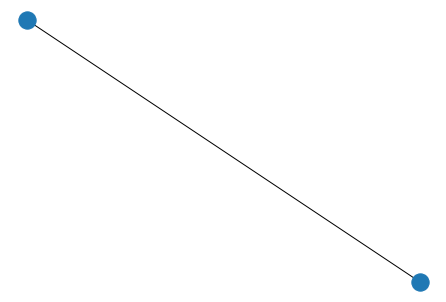

In [99]:
H= G.subgraph(subgraphs[1])
nx.draw(H)

AttributeError: 'set' object has no attribute 'edges'

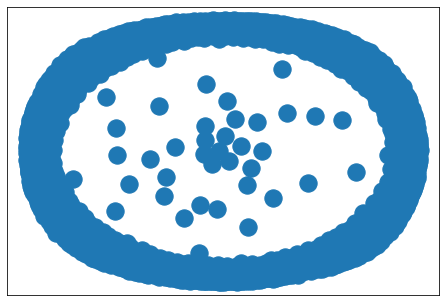

In [100]:
nx.draw(Gmax)